In [1]:
from radialscope import RadialScope as rs
from radialscope import draw_with_indeces
from IPython.display import SVG
from IPython import display
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
import math
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Geometry
import rdkit
from function import get_repeat_df
from function import get_multi_r_df
from function import get_R_list
from function import get_conversion
from function import get_bond_angle
print(rdkit.__version__)


2021.03.4


,reaction,enzyme_type,enzyme_name,short_citation,html_doi,cascade_num,substrate_1_smiles,substrate_2_smiles,product_1_smiles,temperature,...,substrate_1_conc,substrate_2_conc,specific_activity,conversion,conversion_time,categorical,binary,selectivity,auto_generated,Product Mol
0,alpha-amino amination,PAL,AvPAL,"Weise et al, 2020, ChemCatChem",https://doi.org/10.1002/cctc.201902128,1,O=C(O)/C=C/c1ccccc1,NaN,N[C@@H](Cc1ccccc1)C(=O)O,30,...,NaN,NaN,NaN,99.0,22.0,High,True,NaN,False,
1,alpha-amino amination,PAL,AvPAL,"Weise et al, 2020, ChemCatChem",https://doi.org/10.1002/cctc.201902128,2,O=C(O)/C=C/c1ccccc1Br,NaN,N[C@@H](Cc1ccccc1Br)C(=O)O,30,...,NaN,NaN,NaN,98.0,22.0,High,True,NaN,False,
2,alpha-amino amination,PAL,AvPAL,"Weise et al, 2020, ChemCatChem",https://doi.org/10.1002/cctc.201902128,3,O=C(O)/C=C/c1cccc(Br)c1,NaN,N[C@@H](Cc1cccc(Br)c1)C(=O)O,30,...,NaN,NaN,NaN,94.0,22.0,High,True,NaN,False,
3,alpha-amino amination,PAL,AvPAL,"Weise et al, 2020, ChemCatChem",https://doi.org/10.1002/cctc.201902128,4,O=C(O)/C=C/c1ccc(Br)cc1,NaN,N[C@@H](Cc1ccc(Br)cc1)C(=O)O,30,...,NaN,NaN,NaN,94.0,22.0,High,True,NaN,False,
4,alpha-amino amination,PAL,AvPAL,"Weise et al, 2020, ChemCatChem",https://doi.org/10.1002/cctc.201902128,5,O=C(O)/C=C/c1ccccc1Cl,NaN,N[C@@H](Cc1ccccc1Cl)C(=O)O,30,...,NaN,NaN,NaN,97.0,22.0,High,True,NaN,False,

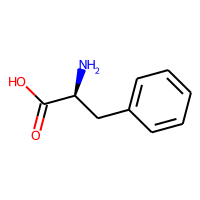
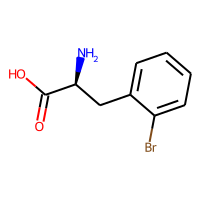
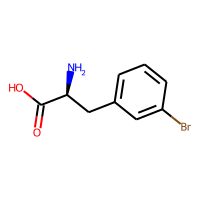
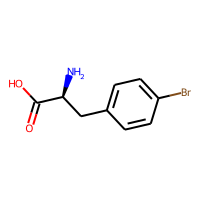
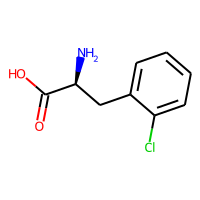

In [2]:
df = pd.read_excel('AL data.xlsx')
a_df=df.replace("Œ±-amino amination", "alpha-amino amination")
b_df=a_df.replace("Œ≤-amino deamination", "beta-amino amination")
df_PAL=b_df[b_df['enzyme_type'] == "PAL"]
df_PAL = df_PAL.dropna(subset=['product_1_smiles'])
PandasTools.AddMoleculeColumnToFrame(df_PAL,'product_1_smiles','Product Mol')
df_PAL.head()
# Make basic adjustments to the table after importing excel
# Then add the “Product Mol” column based on the “product_1_smiles” column.

,reaction,enzyme_type,enzyme_name,short_citation,html_doi,cascade_num,substrate_1_smiles,substrate_2_smiles,product_1_smiles,temperature,...,substrate_1_conc,substrate_2_conc,specific_activity,conversion,conversion_time,categorical,binary,selectivity,auto_generated,Product Mol
319,alpha-amino amination,PAL,EncP_E293M,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1ccccc1,NaN,N[C@@H](Cc1ccccc1)C(=O)O,55,...,1,NaN,NaN,44.0,22.0,Medium,True,95 % ee S,False,
320,alpha-amino amination,PAL,EncP_E293M,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1ccccc1F,NaN,N[C@@H](Cc1ccccc1F)C(=O)O,55,...,1,NaN,NaN,78.0,22.0,High,True,56 % ee S,False,
321,alpha-amino amination,PAL,EncP_E293M,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1cccc(F)c1,NaN,N[C@@H](Cc1cccc(F)c1)C(=O)O,55,...,1,NaN,NaN,61.0,22.0,High,True,87 % ee S,False,
322,alpha-amino amination,PAL,EncP_E293M,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1ccc(F)cc1,NaN,N[C@@H](Cc1ccc(F)cc1)C(=O)O,55,...,1,NaN,NaN,43.0,22.0,Medium,True,95 % ee S,False,
323,alpha-amino amination,PAL,EncP_E293M,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1cc(F)cc(F)c1,NaN,N[C@@H](Cc1cc(F)cc(F)c1)C(=O)O,55,...,1,NaN,NaN,69.0,22.0,High,True,48 % ee S,False,

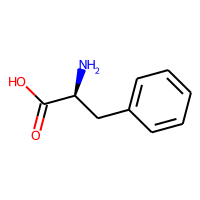
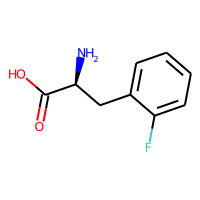
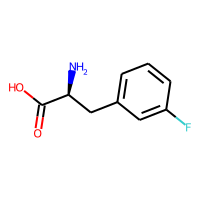
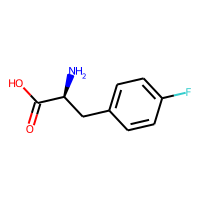
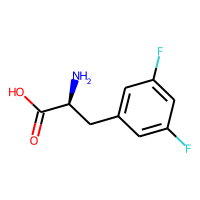

In [3]:
df_EncP_E293M=df_PAL[df_PAL['enzyme_name'] == "EncP_E293M"]
df_EncP_E293M.head()

,reaction,enzyme_type,enzyme_name,short_citation,html_doi,cascade_num,substrate_1_smiles,substrate_2_smiles,product_1_smiles,temperature,...,substrate_1_conc,substrate_2_conc,specific_activity,conversion,conversion_time,categorical,binary,selectivity,auto_generated,Product Mol
275,alpha-amino amination,PAL,EncP_E293Q,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1ccccc1,NaN,N[C@@H](Cc1ccccc1)C(=O)O,55,...,1,NaN,NaN,36.0,22.0,Medium,True,95 % ee S,False,
276,alpha-amino amination,PAL,EncP_E293Q,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1ccccc1F,NaN,N[C@@H](Cc1ccccc1F)C(=O)O,55,...,1,NaN,NaN,73.0,22.0,High,True,50 % ee S,False,
277,alpha-amino amination,PAL,EncP_E293Q,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1cccc(F)c1,NaN,N[C@@H](Cc1cccc(F)c1)C(=O)O,55,...,1,NaN,NaN,52.0,22.0,Medium,True,54 % ee S,False,
278,alpha-amino amination,PAL,EncP_E293Q,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1ccc(F)cc1,NaN,N[C@@H](Cc1ccc(F)cc1)C(=O)O,55,...,1,NaN,NaN,33.0,22.0,Medium,True,95 % ee S,False,
279,alpha-amino amination,PAL,EncP_E293Q,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1cc(F)cc(F)c1,NaN,N[C@@H](Cc1cc(F)cc(F)c1)C(=O)O,55,...,1,NaN,NaN,51.0,22.0,Medium,True,61 % ee S,False,

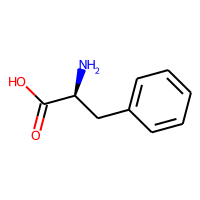
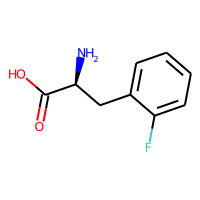
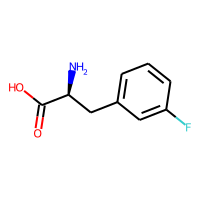
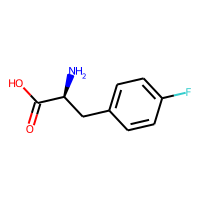
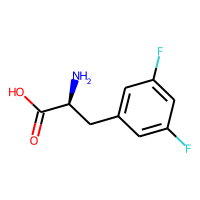

In [4]:
df_EncP_E293Q=df_PAL[df_PAL['enzyme_name'] == "EncP_E293Q"]
df_EncP_E293Q.head()

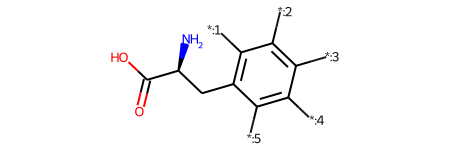

In [5]:
scaffold = Chem.MolFromSmiles(
    'N[C@@H](CC1=C([*:1])C([*:2])=C([*:3])C([*:4])=C1[*:5])C(O)=O')
scaffold

In [7]:
# I've made an edit to this function
# Also it needs to take a positional argument (rather than a keyword argument)
# Also, either this function should alter the df in place (not advised), or the output must be saved
df_EncP_E293M = get_repeat_df(df_EncP_E293M)

In [8]:
df_EncP_E293Q = get_repeat_df(dataframe=df_EncP_E293Q)

,reaction,enzyme_type,enzyme_name,short_citation,html_doi,cascade_num,substrate_1_smiles,substrate_2_smiles,product_1_smiles,temperature,...,R2,R3,R4,R5,R1_smiles,R2_smiles,R3_smiles,R4_smiles,R5_smiles,multiple_r
4,alpha-amino amination,PAL,EncP_E293M,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1cc(F)cc(F)c1,NaN,N[C@@H](Cc1cc(F)cc(F)c1)C(=O)O,55,...,,None,,None,None,F[*:2],None,F[*:4],None,True
5,alpha-amino amination,PAL,EncP_E293M,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1c(F)c(F)c(F)c(F)c1F,NaN,N[C@@H](Cc1c(F)c(F)c(F)c(F)c1F)C(=O)O,55,...,,,,,F[*:1],F[*:2],F[*:3],F[*:4],F[*:5],True

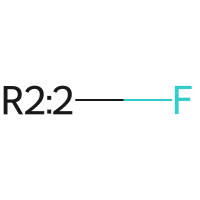
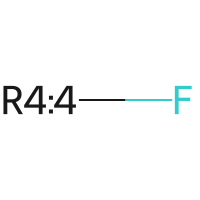
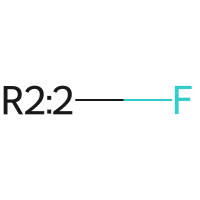
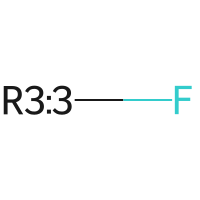
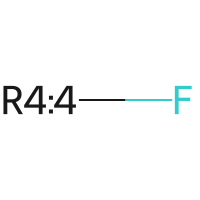
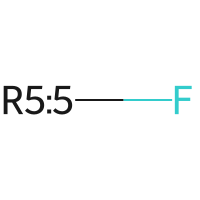

In [9]:



get_multi_r_df(scaffold, df_EncP_E293M)
# Creat a new dataframe to show molecules
# with multiple R groups

,reaction,enzyme_type,enzyme_name,short_citation,html_doi,cascade_num,substrate_1_smiles,substrate_2_smiles,product_1_smiles,temperature,...,R2,R3,R4,R5,R1_smiles,R2_smiles,R3_smiles,R4_smiles,R5_smiles,multiple_r
4,alpha-amino amination,PAL,EncP_E293Q,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1cc(F)cc(F)c1,NaN,N[C@@H](Cc1cc(F)cc(F)c1)C(=O)O,55,...,,None,,None,None,F[*:2],None,F[*:4],None,True
5,alpha-amino amination,PAL,EncP_E293Q,"Weise et al, 2015, JACS",http://doi.org/10.1021/jacs.5b07326,NaN,O=C(O)/C=C/c1c(F)c(F)c(F)c(F)c1F,NaN,N[C@@H](Cc1c(F)c(F)c(F)c(F)c1F)C(=O)O,55,...,,,,,F[*:1],F[*:2],F[*:3],F[*:4],F[*:5],True

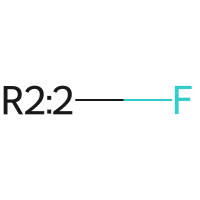
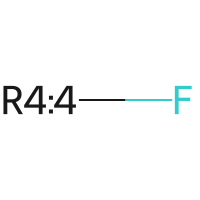
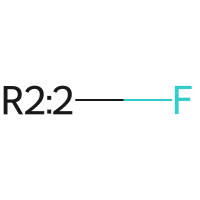
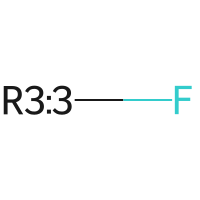
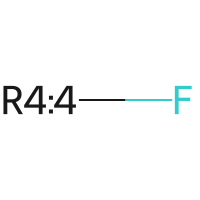
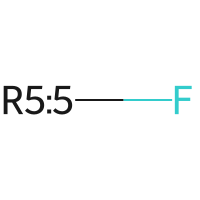

In [10]:
get_multi_r_df(scaffold, df_EncP_E293Q)

In [19]:
EncP_E293M_r1= get_R_list(scaffold,df_EncP_E293M,"R1",1)
EncP_E293M_r2= get_R_list(scaffold,df_EncP_E293M,"R2",2)
EncP_E293M_r3= get_R_list(scaffold,df_EncP_E293M,"R3",3)
EncP_E293Q_r1= get_R_list(scaffold,df_EncP_E293Q,"R1",1)
EncP_E293Q_r2= get_R_list(scaffold,df_EncP_E293Q,"R2",2)
EncP_E293Q_r3= get_R_list(scaffold,df_EncP_E293Q,"R3",3)

In [20]:
EncP_E293M_r1

['F', 'Cl', 'Br', 'O=[N+]([O-])', 'CO', 'C']

In [22]:
EncP_E293M_r2

['F', 'Cl', 'Br', 'O=[N+]([O-])', 'CO', 'C', 'N#C']

In [23]:
EncP_E293M_r3

['F', 'Cl', 'Br', 'O=[N+]([O-])', 'CO', 'C']

In [29]:
EncP_E293M_C1=get_conversion(scaffold,df_EncP_E293M,"R1",1)
EncP_E293M_C1

[78, 86, 82, 90, 20, 61]

In [30]:
EncP_E293M_C2=get_conversion(scaffold,df_EncP_E293M,"R2",2)
EncP_E293M_C2

[61, 73, 76, 70, 48, 43, 28]

In [31]:
EncP_E293M_C3=get_conversion(scaffold,df_EncP_E293M,"R3",3)
EncP_E293M_C3

[43, 40, 34, 34, 10, 22]

In [12]:
EncP_E293M_C1=get_conversion(scaffold,df_EncP_E293M,"R1",1)
EncP_E293M_C2=get_conversion(scaffold,df_EncP_E293M,"R2",2)
EncP_E293M_C3=get_conversion(scaffold,df_EncP_E293M,"R3",3)
EncP_E293Q_C1=get_conversion(scaffold,df_EncP_E293Q,"R1",1)
EncP_E293Q_C2=get_conversion(scaffold,df_EncP_E293Q,"R2",2)
EncP_E293Q_C3=get_conversion(scaffold,df_EncP_E293Q,"R3",3)

In [24]:
EncP_E293M_C1

[78, 86, 82, 90, 20, 61]

In [25]:
EncP_E293M_C2

[61, 73, 76, 70, 48, 43, 28]

In [26]:
EncP_E293M_C3

[43, 40, 34, 34, 10, 22]

In [27]:
len(EncP_E293M_r1)

6

In [28]:
15*len(EncP_E293M_r1)a

90

In [14]:
get_bond_angle(scaffold, 5)

13.728538047969128

In [29]:
270-get_bond_angle(scaffold, 5)+15*len(EncP_E293M_r1)/2

301.27146195203085

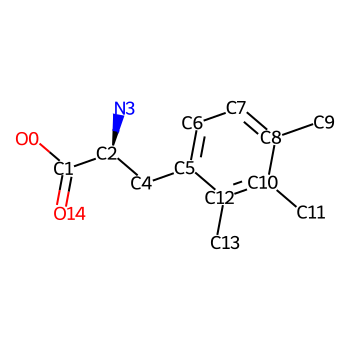

In [16]:
settings={ 'SMILESSTRING':'OC([C@@H](N)CC1=CC=C(C)C(C)=C1C)=O',  # use methyl groups for your rests, smiles strings can't use labels
  'use_bw_atom_theme':False,  # draw all atoms black
 'use_bold_font': True, # replace all fonts wherever possible with bold text
 'white_cutoff': 80,  #make text of labels white if greater than this number
  'scalefactor':0.8  #scale the total plot in the end, for large molecule you will need to decrease this or make the viewbox bigger in a vector software such as Inkscape
}


## code that draws the molecule with all indexes so that you can pick the atoms you want to label
SVG(draw_with_indeces(settings))

In [17]:
radial_scope_setup_R1 = {
    'rest_label':"R$_1$", # Label of the atom in the radial scope plot
    'no_wedges':len(EncP_E293M_r1), # Number of wedges in the Radial scope Plot
    'coverangle_wedges':15*len(EncP_E293M_r1), # Degrees of a full circle the Rscope should cover
    'startangle':270-get_bond_angle(scaffold, 5)+15*len(EncP_E293M_r1)/2, #Start angle of the Rscope 
    'CMAPINNER':"Blues",  # Colormap of the inner circle. Max value has full color, options see below
    'CMAPOUTER':"Greens", # Colormap of the outer circle. Max value has full color
    'OUTERLABEL':"EncP_E293M % conversion", # Label of the outer circle
    'INNERLABEL':"EncP_E293Q % conversion", # Label of the inner circle
    'value_inner_circle':EncP_E293Q_C1,
    'value_outer_circle':EncP_E293M_C1,
    'min_max_value':[(0,0),(100,100)],  # Define minimum and maximum for each colorbar [(inner_min, outer_min),(inner_max, outer_max)]
    'rounding':True, # ENABLE rounding if you want something like >99 
    'rounding_boundary':99,  # cutoff for displaying > 
    'value_groups':EncP_E293M_r1, # Labels for the outer circle, you can use math using $, any ~ will be interpreted as smiles string
    'attach_atom_id': 13,
}

radial_scope_setup_R2 = {
    'rest_label':"R$_2$", # Label of the atom in the radial scope plot
    'no_wedges':len(EncP_E293M_r2), # Number of wedges in the Radial scope Plot
    'coverangle_wedges':15*len(EncP_E293M_r2), # Degrees of a full circle the Rscope should cover
    'startangle':270-get_bond_angle(scaffold, 4)+15*len(EncP_E293M_r2)/2, #Start angle of the Rscope 
    'CMAPINNER':"Blues",  # Colormap of the inner circle. Max value has full color, options see below
    'CMAPOUTER':"Greens", # Colormap of the outer circle. Max value has full color
    'OUTERLABEL':"EncP_E293M % conversion", # Label of the outer circle
    'INNERLABEL':"EncP_E293Q % conversion", # Label of the inner circle
    'value_inner_circle':EncP_E293Q_C2,
    'value_outer_circle':EncP_E293M_C2,
    'min_max_value':[(0,0),(100,100)],  # Define minimum and maximum for each colorbar [(inner_min, outer_min),(inner_max, outer_max)]
    'rounding':True, # ENABLE rounding if you want something like >99 
    'rounding_boundary':99,  # cutoff for displaying > 
    'value_groups':EncP_E293M_r2, # Labels for the outer circle, you can use math using $, any ~ will be interpreted as smiles string
    'attach_atom_id': 11,
}

radial_scope_setup_R3 = {
    'rest_label':"R$_3$", # Label of the atom in the radial scope plot
    'no_wedges':len(EncP_E293M_r3), # Number of wedges in the Radial scope Plot
    'coverangle_wedges':15*len(EncP_E293M_r3), # Degrees of a full circle the Rscope should cover
    'startangle':270-get_bond_angle(scaffold, 3)+15*len(EncP_E293M_r3)/2, #Start angle of the Rscope 
    'CMAPINNER':"Blues",  # Colormap of the inner circle. Max value has full color, options see below
    'CMAPOUTER':"Greens", # Colormap of the outer circle. Max value has full color
    'OUTERLABEL':"EncP_E293M % conversion", # Label of the outer circle
    'INNERLABEL':"EncP_E293Q % conversion", # Label of the inner circle
    'value_inner_circle':EncP_E293Q_C3,
    'value_outer_circle':EncP_E293M_C3,
    'min_max_value':[(0,0),(100,100)],  # Define minimum and maximum for each colorbar [(inner_min, outer_min),(inner_max, outer_max)]
    'rounding':True, # ENABLE rounding if you want something like >99 
    'rounding_boundary':99,  # cutoff for displaying > 
    'value_groups':EncP_E293M_r3, # Labels for the outer circle, you can use math using $, any ~ will be interpreted as smiles string
    'attach_atom_id': 9,
}


File written to: C:\Users\10573\Radial scope/substrate_scope_replaced.svg


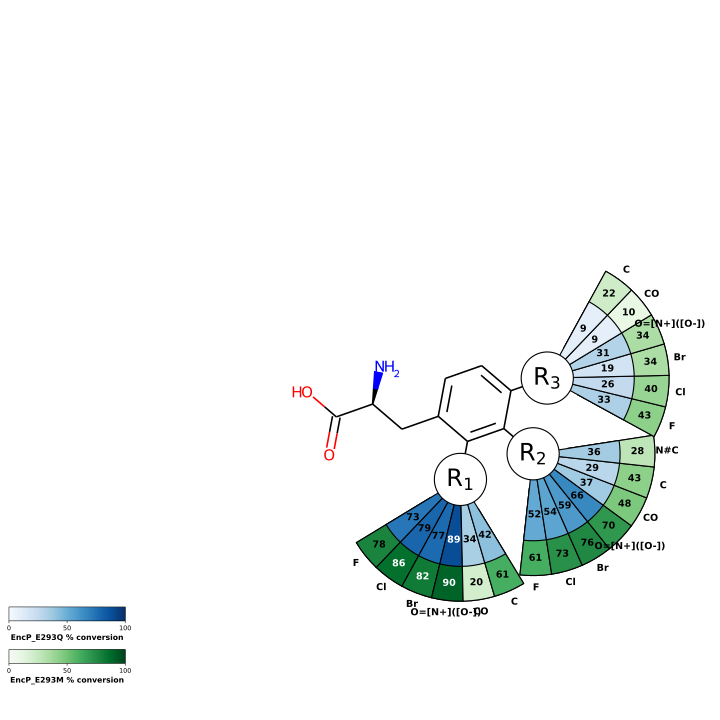

In [18]:
scope_plot=rs(settings, 
              radial_scope_setup_R1, 
              radial_scope_setup_R2, 
              radial_scope_setup_R3) # add all radial_scope dictionaries to this call
SVG('substrate_scope_replaced.svg')